#### Question:

Segment each component in the image and highlight the barcode using image preprocessing techniques. Build a function from scratch rather using any existing method for barcode highlighting.

`Import the required libraries`

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import imutils

In [10]:
# !pip install imutils

`Function to display the images`

In [13]:
def display(img,name):
    plt.figure(figsize=(10, 10))
    plt.title(name)
    plt.imshow(img) 
    plt.axis('off')

`Read the image`

In [3]:
input_img = cv2.imread('Bill.jpg')
gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
input_img.shape, gray.shape

((1390, 919, 3), (1390, 919))

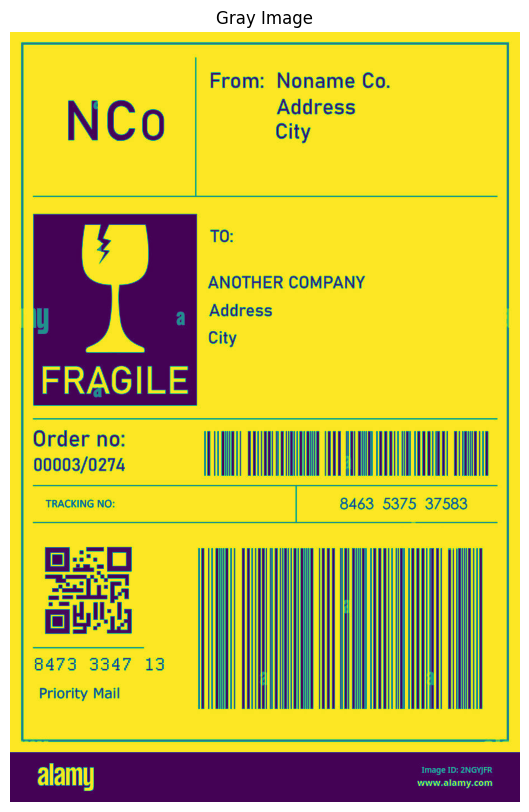

In [14]:
display(gray,'Gray Image')

`Scharr gradient magnitude representation of the images`

In [7]:
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx=0, dy=1, ksize=-1)
# Sobel is used to detect the edges of the image in both the x and y direction
# cv2.CV_32F is a constant used to specify the depth of the image whose values is a 32-bit floating point number 5.0 

In [9]:
gradX.shape, gradY.shape

((1390, 919), (1390, 919))

In [10]:
# subtract the y-gradient from the x-gradient to get the gradient magnitude
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient) # convert the gradient image back to unsigned 8-bit integer 
#  By performing this subtraction we are left with regions of the image that have high horizontal gradients and low vertical gradients.

In [11]:
gradient.shape

(1390, 919)

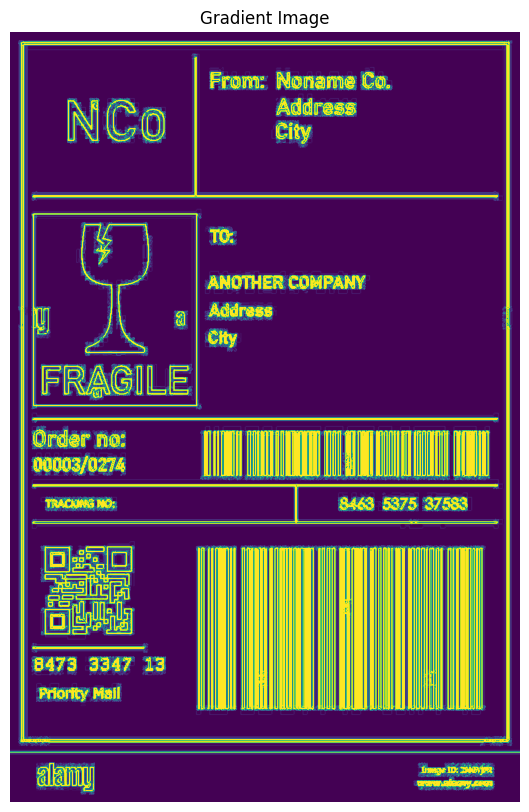

In [15]:
display(gradient,'Gradient Image')

`Blur and Threshold the image`

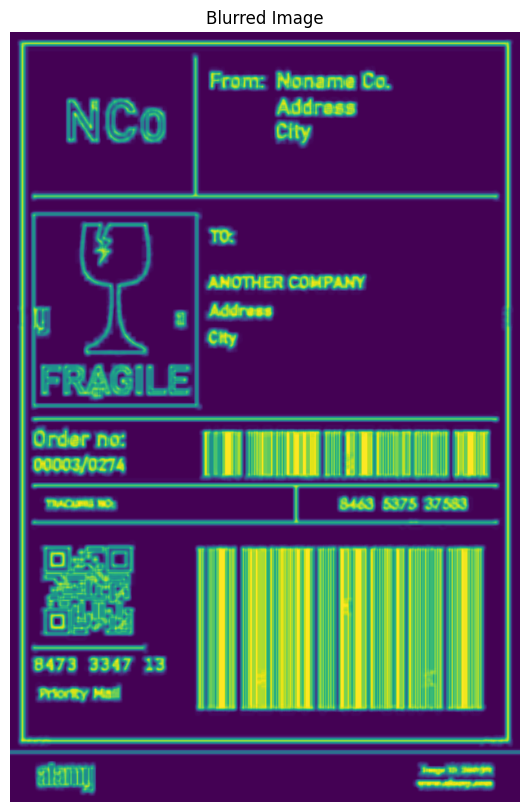

In [16]:
blurred = cv2.blur(gradient, (7, 7))
display(blurred,'Blurred Image')

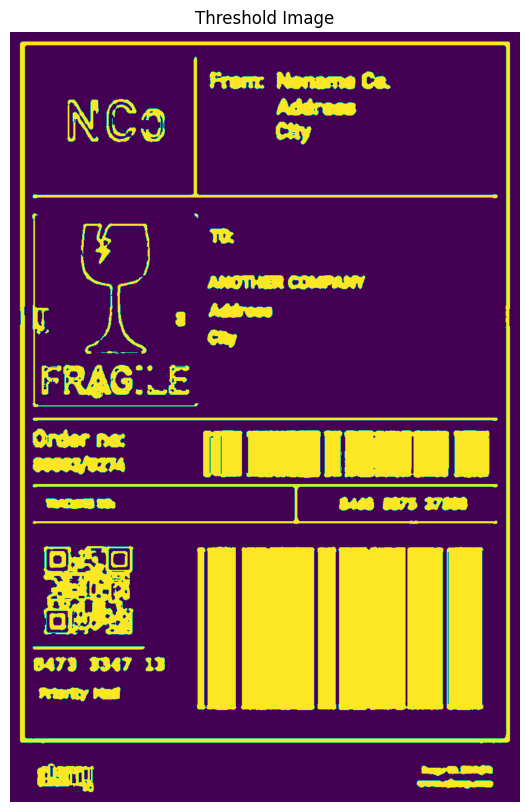

In [17]:
(_, thresh) = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
display(thresh,'Threshold Image')

`Closing Kernel`

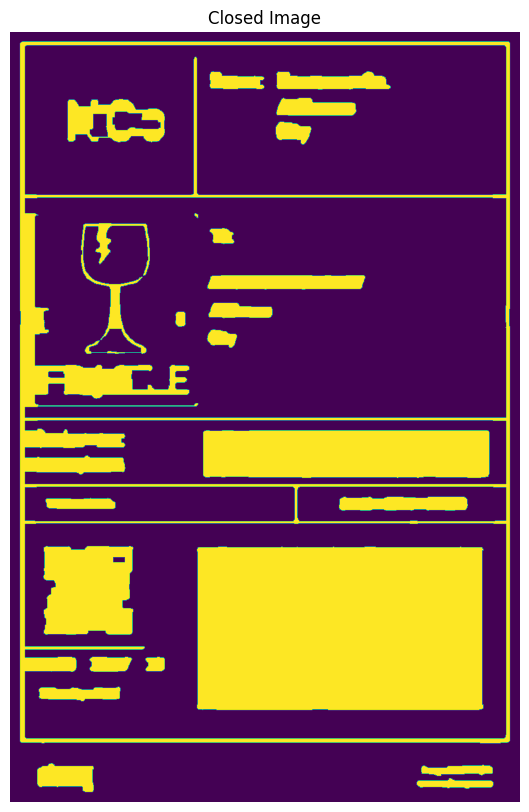

In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
display(closed,'Closed Image')

`Erosions and Dilations`

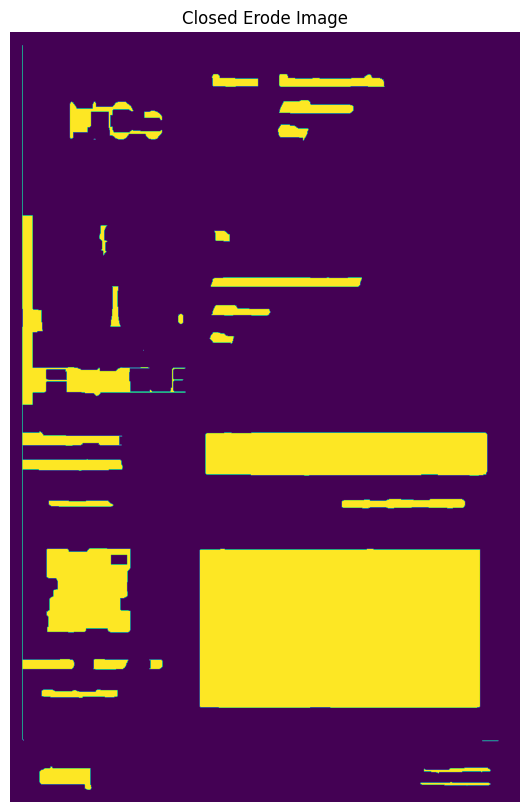

In [27]:
closed_erode = cv2.erode(closed, None, iterations = 4)
display(closed_erode,'Closed Erode Image')

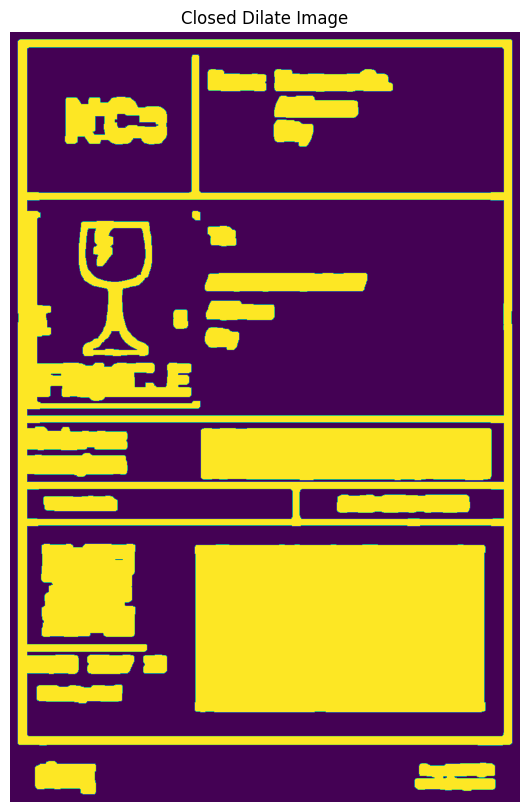

In [28]:
closed_dilate = cv2.dilate(closed, None, iterations = 4)
display(closed_dilate,'Closed Dilate Image')

`Contours`

In [32]:
contours, hierarchy = cv2.findContours(closed_dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
# contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [33]:
image = input_img.copy()
box1 = cv2.drawContours(image, contours, 8, (0,255,0), 3)
box2 = cv2.drawContours(image, contours, 16, (0,255,0), 3)

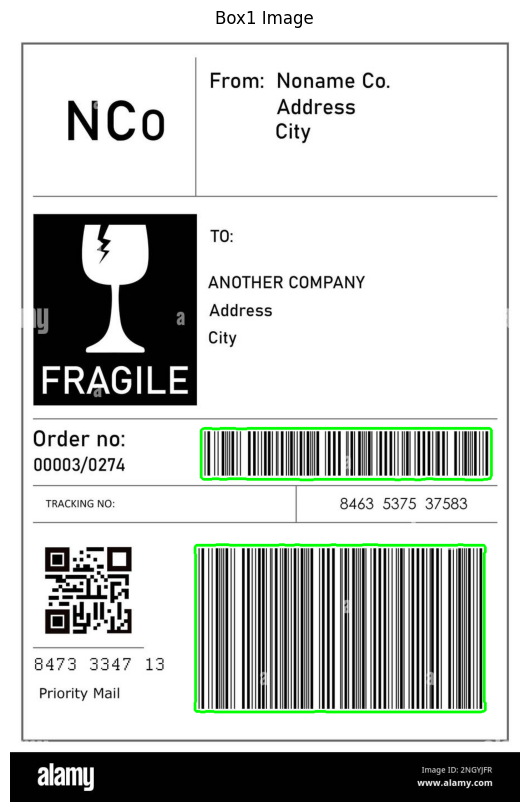

In [34]:
display(box1,'Box1 Image')